## comparing llm output to ground truth story (also generated by llm)

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read in data from json
folder = "json/threads/"

with open(folder + 'story_outline.json') as f:
    og_data = json.load(f)

In [6]:
with open(folder + 'final_data.json') as f:
    new_data = json.load(f)

In [7]:
# set up variables
og_scenes = og_data['scenes']
og_characters = og_data['characters']
og_locations = og_data['locations']
og_chapters = og_data['chapters']

new_scenes = new_data['scenes']
new_characters = new_data['characters']
new_locations = new_data['locations']
new_chapters = new_data['chapters']

In [9]:
# overall stats
print("Overall Stats")
print("Original Scenes: ", len(og_scenes))
print("New Scenes: ", len(new_scenes))
print()
print("Original Characters: ", len(og_characters))
print("New Characters: ", len(new_characters))
print()
print("Original Locations: ", len(og_locations))
print("New Locations: ", len(new_locations))

Overall Stats
Original Scenes:  42
New Scenes:  55

Original Characters:  17
New Characters:  16

Original Locations:  10
New Locations:  7


In [16]:
# chapter comparison
df = pd.DataFrame()

scenes_per_chap_og = []
scenes_per_chap_new = []
importance_og = []
importance_new = []
conflict_og = []
conflict_new = []
num_locations_og = []
num_locations_new = []
num_characters_og = []
num_characters_new = []

for i, chap in enumerate(og_chapters):
    scenes_per_chap_og.append(chap['scenes'])
    scenes_per_chap_new.append(new_chapters[i]['scenes'])
    importance_og.append(chap['importance'])
    importance_new.append(new_chapters[i]['importance'])
    conflict_og.append(chap['conflict'])
    conflict_new.append(new_chapters[i]['conflict'])
    num_locations_og.append(len(chap['locations']))
    num_locations_new.append(len(new_chapters[i]['locations']))
    num_characters_og.append(len(chap['characters']))
    num_characters_new.append(len(new_chapters[i]['characters']))

# each row is a chapter
df['Chapter'] = range(1, len(og_chapters) + 1)
df['num_scenes_og'] = scenes_per_chap_og
df['num_scenes_new'] = scenes_per_chap_new
df['importance_og'] = importance_og
df['importance_new'] = importance_new
df['conflict_og'] = conflict_og
df['conflict_new'] = conflict_new
df['num_locations_og'] = num_locations_og
df['num_locations_new'] = num_locations_new
df['num_characters_og'] = num_characters_og
df['num_characters_new'] = num_characters_new

df.head()

,Chapter,num_scenes_og,num_scenes_new,importance_og,importance_new,conflict_og,conflict_new,num_locations_og,num_locations_new,num_characters_og,num_characters_new
0,1,3,3,0.58,0.83,0.33,0.63,2,2,4,3
1,2,3,4,0.42,0.93,0.42,0.85,3,2,3,3
2,3,3,4,0.33,0.85,0.25,0.70,2,3,3,3
3,4,3,5,0.25,0.90,0.17,0.82,2,1,4,4
4,5,3,5,0.67,0.84,0.58,0.56,2,3,5,4


In [41]:
# compute differences
df['diff_scenes'] = df['num_scenes_new'] - df['num_scenes_og']
df['diff_importance'] = df['importance_new'] - df['importance_og']
df['diff_conflict'] = df['conflict_new'] - df['conflict_og']
df['diff_locations'] = df['num_locations_new'] - df['num_locations_og']
df['diff_characters'] = df['num_characters_new'] - df['num_characters_og']

df

,Chapter,num_scenes_og,num_scenes_new,importance_og,importance_new,conflict_og,conflict_new,num_locations_og,num_locations_new,num_characters_og,num_characters_new,diff_scenes,diff_importance,diff_conflict,diff_locations,diff_characters
0,1,3,3,0.58,0.83,0.33,0.63,2,2,4,3,0,0.25,0.30,0,-1
1,2,3,4,0.42,0.93,0.42,0.85,3,2,3,3,1,0.51,0.43,-1,0
2,3,3,4,0.33,0.85,0.25,0.70,2,3,3,3,1,0.52,0.45,1,0
3,4,3,5,0.25,0.90,0.17,0.82,2,1,4,4,2,0.65,0.65,-1,0
4,5,3,5,0.67,0.84,0.58,0.56,2,3,5,4,2,0.17,-0.02,1,-1
5,6,4,4,0.75,0.90,0.67,0.80,4,3,4,3,0,0.15,0.13,-1,-1
6,7,3,3,0.83,0.93,0.58,0.87,2,2,5,3,0,0.10,0.29,0,-2
7,8,4,6,0.58,0.90,0.75,0.83,3,4,6,6,2,0.32,0.08,1,0
8,9,4,5,0.92,0.94,0.92,0.88,3,2,5,5,1,0.02,-0.04,-1,0
9,10,4,5,0.75,0.96,1.00,0.92,2,1,7,4,1,0.21,-0.08,-1,-3


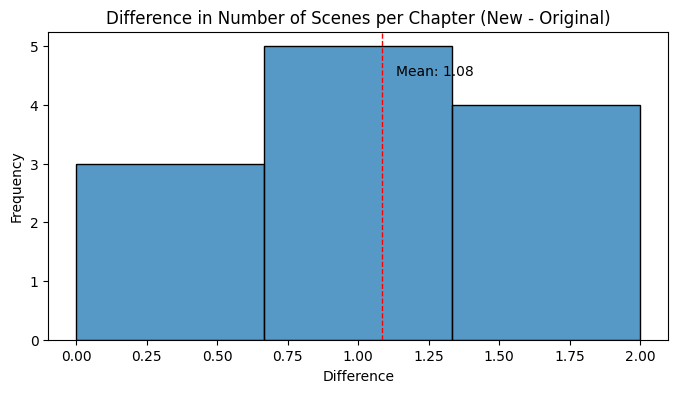

In [45]:
# plot histogram of diff_scenes
# make the plot aesthetic
# and show the mean

plt.figure(figsize=(8, 4))
sns.histplot(df['diff_scenes'], bins=3)
plt.axvline(df['diff_scenes'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_scenes'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_scenes'].mean()))
plt.title("Difference in Number of Scenes per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

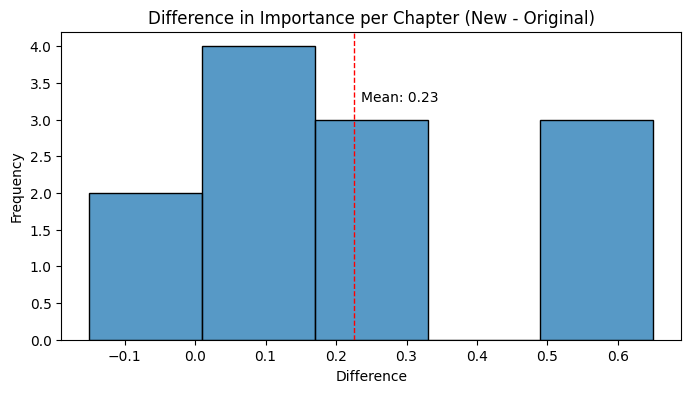

In [35]:
# plot histogram of diff_importance
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_importance'])
plt.axvline(df['diff_importance'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_importance'].mean() + 0.01, 3.25, 'Mean: {:.2f}'.format(df['diff_importance'].mean()))
plt.title("Difference in Importance per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

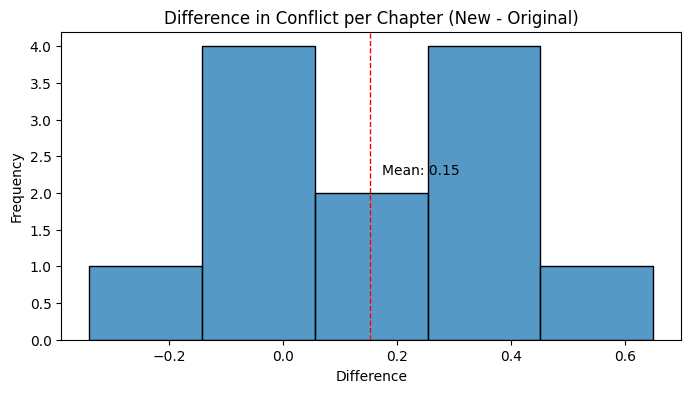

In [38]:
# plot histogram of diff_conflict
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_conflict'])
plt.axvline(df['diff_conflict'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_conflict'].mean() + 0.02, 2.25, 'Mean: {:.2f}'.format(df['diff_conflict'].mean()))
plt.title("Difference in Conflict per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

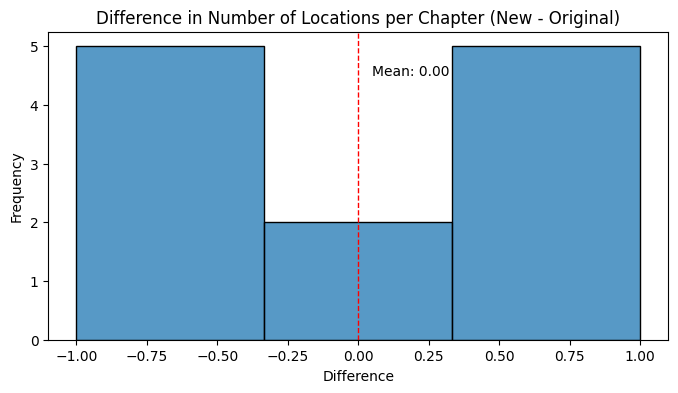

In [44]:
# plot histogram of diff_locations
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_locations'], bins=3)
plt.axvline(df['diff_locations'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_locations'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_locations'].mean()))
plt.title("Difference in Number of Locations per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

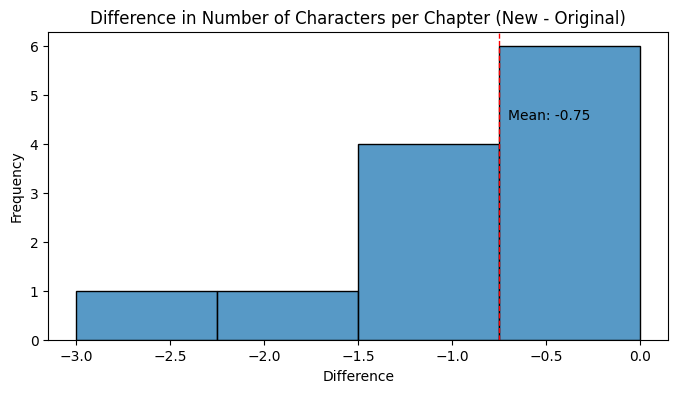

In [47]:
# plot histogram of diff_characters
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_characters'], bins=4)
plt.axvline(df['diff_characters'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_characters'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_characters'].mean()))
plt.title("Difference in Number of Characters per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

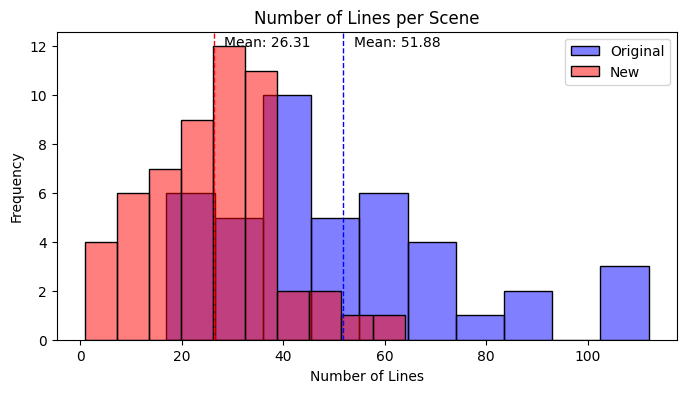

In [54]:
# collect num_lines for each scene
num_lines_og = []
num_lines_new = []

for scene in og_scenes:
    num_lines_og.append(scene['last_line'] - scene['first_line'] + 1)

for scene in new_scenes:
    num_lines_new.append(scene['num_lines'])

# plot both histograms on the same plot
plt.figure(figsize=(8, 4))
sns.histplot(num_lines_og, color='blue', bins=10, alpha=0.5, label='Original')
# add mean line
plt.axvline(sum(num_lines_og) / len(num_lines_og), color='blue', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_lines_og) / len(num_lines_og) + 2, 12, 'Mean: {:.2f}'.format(sum(num_lines_og) / len(num_lines_og)))
sns.histplot(num_lines_new, color='red', bins=10, alpha=0.5, label='New')
# add mean line
plt.axvline(sum(num_lines_new) / len(num_lines_new), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_lines_new) / len(num_lines_new) + 2, 12, 'Mean: {:.2f}'.format(sum(num_lines_new) / len(num_lines_new)))
plt.title("Number of Lines per Scene")
plt.xlabel("Number of Lines")
plt.ylabel("Frequency")
plt.legend()
plt.show()
    

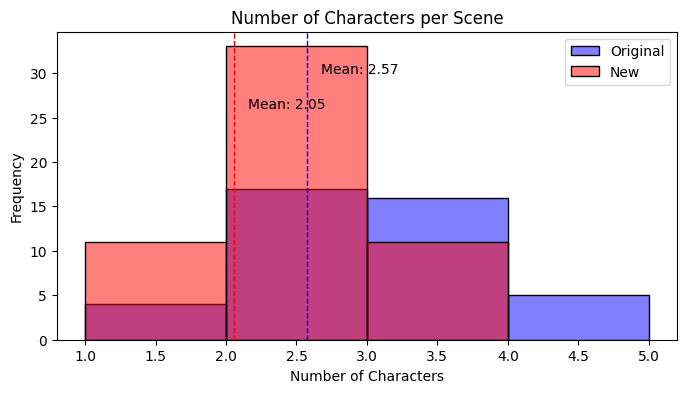

In [60]:
# collect number of characters for each scene
num_characters_og = []
num_characters_new = []

for scene in og_scenes:
    num_characters_og.append(len(scene['characters']))

for scene in new_scenes:
    num_characters_new.append(len(scene['characters']))

# plot both histograms on the same plot
plt.figure(figsize=(8, 4))
sns.histplot(num_characters_og, color='blue', binwidth=1, alpha=0.5, label='Original')
# add mean line
plt.axvline(sum(num_characters_og) / len(num_characters_og), color='blue', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_characters_og) / len(num_characters_og) + 0.1, 30, 'Mean: {:.2f}'.format(sum(num_characters_og) / len(num_characters_og)))
sns.histplot(num_characters_new, color='red', binwidth=1, alpha=0.5, label='New')
# add mean line
plt.axvline(sum(num_characters_new) / len(num_characters_new), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_characters_new) / len(num_characters_new) + 0.1, 26, 'Mean: {:.2f}'.format(sum(num_characters_new) / len(num_characters_new)))
plt.title("Number of Characters per Scene")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.legend()
plt.show()